In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
image_data = pd.read_pickle('../../data/Visual_well_being/image_data.pickle')
# Keep only filters, remove Unknown and Normal entries
filter_data = image_data[~image_data.image_filter.isin(['Normal', 'Unknown'])][['image_id', 'image_filter']]

In [3]:
filter_categories = pd.read_csv('../../data/Visual_well_being/filter_categories.csv', sep=';')
filter_categories = filter_categories.rename(columns={'class':'happiness_class'})

In [4]:
image_data.head()

,image_id,image_link,image_url,image_height,image_width,image_filter,image_posted_time_unix,image_posted_time,data_memorability,user_id,user_full_name,user_name,user_website,user_profile_pic,user_bio,user_followed_by,user_follows,user_posted_photos
0,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,Leah Jenkins,leah.chelle,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0
1,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
2,594552614686078174_263042348,https://www.instagram.com/p/hARnP2pLTe/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Vesper,1385096216,22-11-2013 04:56:56,0.672679,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
3,553884883234370621_263042348,https://www.instagram.com/p/evy13fpLQ9/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1380248245,27-09-2013 02:17:25,0.843525,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
4,725551583154452417_263042348,https://www.instagram.com/p/oRrVIcJLfB/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1400712510,21-05-2014 22:48:30,0.859796,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0


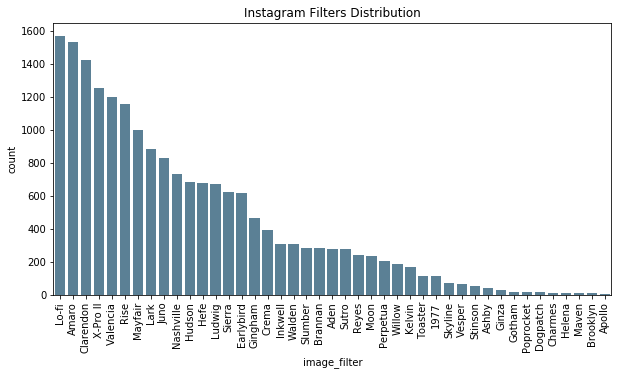

In [5]:
fig = plt.figure(figsize=(10, 5))

plot = sns.countplot(x='image_filter', data=filter_data, color = '#52839e', order=filter_data.image_filter.value_counts().index)
plot.set_title('Instagram Filters Distribution')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

In [6]:
# Remove images whose filter is not associated with a class (only 23 of them, no big deal)
filter_data = filter_data[filter_data.image_filter.isin(filter_categories['filter'])]
# Add filter category information to the dataFrame
filter_data = filter_data.merge(filter_categories, how='left', left_on='image_filter', right_on='filter').drop('filter', axis=1)

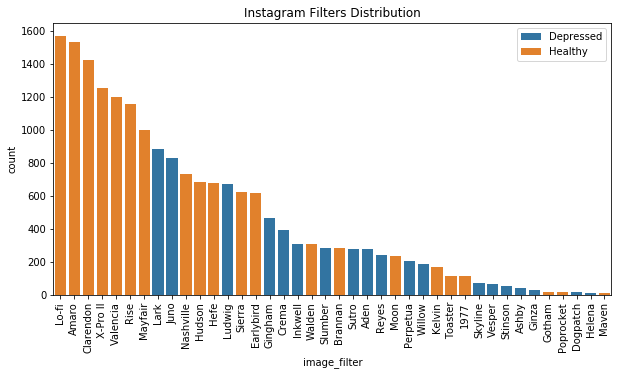

In [7]:
fig = plt.figure(figsize=(10, 5))

plot = sns.countplot(x='image_filter', data=filter_data, hue='happiness_class', dodge=False, order=filter_data.image_filter.value_counts().index)
plot.set_title('Instagram Filters Distribution')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.legend(['Depressed', 'Healthy'])
plt.show()